In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [83]:
def plot_timeseries(df: pd.DataFrame, indx=0 ) -> None:
    '''Plot the generated time series data.
        Args:
            df: Pandas DataFrame with the generated data
            indx: index of the time series to plot
        '''
    df[f'y{indx}' ].plot(style='o')  

    plt.show()

In [84]:
def sin_fit(t, A, P, phi):
    return(A * np.sin(((2 * np.pi / P) * t) + phi))

In [85]:
x, y = data_read('single')
x = x.reshape(-1,1)
x = x.flatten()

In [86]:
time_space = np.linspace(0, 100, 100)
pred_fit = curve_fit(sin_fit, xdata=x, ydata=y, p0=[-1, 30, 0])[0]
print(pred_fit)

[-1.         40.          3.02158641]


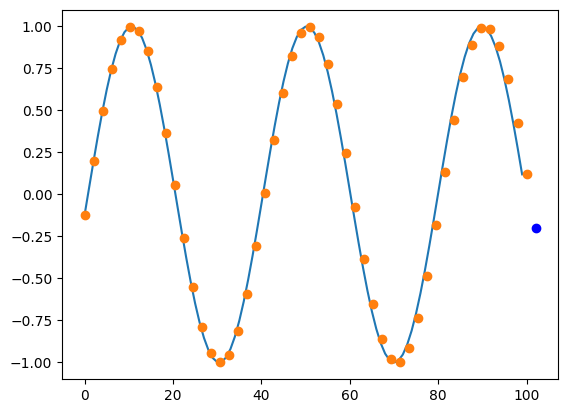

In [88]:
plt.plot(sin_fit(time_space, *pred_fit))
next_t = time_range[1] + x[-1]
predStep = sin_fit(next_t, *pred_fit)

plt.scatter(next_t, predStep, color = 'blue')
plot_timeseries(df_single, indx=50)

In [18]:
def data_read(data_type):
    if (data_type == 'single'):
        df = pd.read_feather("Project data/timeseries_single_frequency.feather")
        
    elif (data_type == 'multiple'):
        df = pd.read_feather("Project data/timeseries_multiple_frequency.feather")
        
    if (data_type == 'multiple_sampled'):
        df = pd.read_feather("Project data/timeseries_multiple_frequency_sampled.feather")
        
    tSeries = df['y50']
    time_range = tSeries.axes[0].tolist()
    intensity_data = tSeries.values
    
    return(np.array(time_range), intensity_data)

In [42]:
x, y = data_read('multiple')
x = x.reshape(-1,1)
x = x.flatten()

In [43]:
time_space = np.linspace(0, 100, 100)
pred_fit_multiple = curve_fit(sin_fit, xdata=x, ydata=y, p0=[1, 75, 0])[0]
print(pred_fit_multiple)

[ 1.         77.45526256  0.74124722]


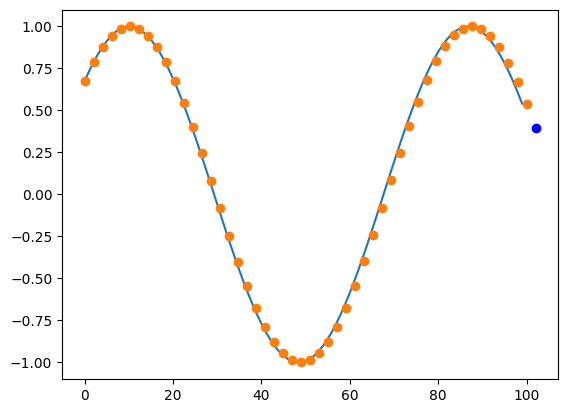

In [44]:
plt.plot(sin_fit(time_space, *pred_fit_multiple))
next_t = time_range[1] + x[-1]
predStep = sin_fit(next_t, *pred_fit_multiple)

plt.scatter(next_t, predStep, color = 'blue')
plot_timeseries(pd.read_feather("Project data/timeseries_multiple_frequency.feather"), indx=50)

In [45]:
x, y = data_read('multiple_sampled')
x = x.reshape(-1,1)
x = x.flatten()
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

In [46]:
time_space = np.linspace(0, 100, 100)
pred_fit_multiple = curve_fit(sin_fit, xdata=x, ydata=y, p0=[1, 75, 0])[0]
print(pred_fit_multiple)

[ 1.         77.45526256  0.74124722]


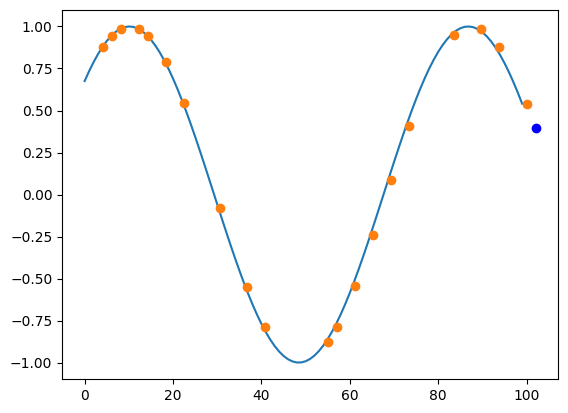

In [47]:
plt.plot(sin_fit(time_space, *pred_fit_multiple))
next_t = time_range[1] + x[-1]
predStep = sin_fit(next_t, *pred_fit_multiple)

plt.scatter(next_t, predStep, color = 'blue')
plot_timeseries(pd.read_feather("Project data/timeseries_multiple_frequency_sampled.feather"), indx=50)

In [50]:
plasticc_metadata = pd.read_pickle('Project data/plasticc_lightcurves_g_metadata.pkl')
with open('Project data/plasticc_lightcurves_g.pkl', 'rb') as file:
    plasticc_LC = pickle.load(file)

In [81]:
x = plasticc_LC[plasticc_metadata['object_id'].iloc[20]].index.values
y = plasticc_LC[plasticc_metadata['object_id'].iloc[20]].values

In [82]:
time_space = np.linspace(0, 100, 100)
pred_fit_multiple = curve_fit(sin_fit, xdata=x, ydata=y, p0=[1, 75, 0])[0]
print(pred_fit_multiple)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [ ]:
plt.plot(sin_fit(time_space, *pred_fit_multiple))
next_t = time_range[1] + x[-1]
predStep = sin_fit(next_t, *pred_fit_multiple)

plt.scatter(next_t, predStep, color = 'blue')
plot_timeseries(pd.read_feather("Project data/timeseries_multiple_frequency_sampled.feather"), indx=50)